# Module 8 Assignment

A few things you should keep in mind when working on assignments:

1. Run the first code cell to import modules needed by this assignment before proceeding to problems.
2. Make sure you fill in any place that says `# YOUR CODE HERE`. Do not write your answer anywhere else other than where it says `# YOUR CODE HERE`. Anything you write elsewhere will be removed or overwritten by the autograder.
3. Each problem has an autograder cell below the answer cell. Run the autograder cell to check your answer. If there's anything wrong in your answer, the autograder cell will display error messages.
4. Before you submit your assignment, make sure everything runs as expected. Go to the menubar, select Kernel, and Restart & Run all. If the notebook runs through the last code cell without an error message, you've answered all problems correctly.
5. Make sure that you save your work (in the menubar, select File → Save and CheckPoint).

-----

# Run Me First!

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

from nose.tools import assert_equal, assert_true

-----

## Problem 1: Converting Datetme String to Datetime Object

In the Code cell below, we declare a function named `convert_datetime` that takes one argument: `datetime_str`, which is a string representation of datetime. The `datetime_str` is in "yyyy-mm-dd HH:MM:SS" format(ie. "2019-09-30 12:30:59")

To complete this problem, finish writing the function `convert_datetime`:
- Convert a datetime string in "yyyy-mm-dd HH:MM:SS" format to a datetime object.
- Return the datetime object.

-----

In [2]:
def convert_datetime(datetime_str):
    # YOUR CODE HERE
    d = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
    return d

In [3]:
assert_equal(convert_datetime('2019-09-09 00:00:00'), datetime(2019, 9, 9),
             msg='convert_datetime is not defined correctly')
assert_equal(convert_datetime('2019-09-09 12:59:59'), datetime(2019, 9, 9,12,59,59),
             msg='convert_datetime is not defined correctly')


In [4]:
convert_datetime('2019-09-09 00:00:00')

datetime.datetime(2019, 9, 9, 0, 0)

-----

## Problem 2: Reading in Data

In the Code cell below, we declare a function named `read_data` that takes one function parameter: `file_path`, which is a string.

To complete this problem, finish writing the function `read_data`:
- Read data from the file specified in the string `file_path`, by using the Pandas `read_csv` function.
- Return the resulting DataFrame.

-----

In [5]:
def read_data(file_path):
    '''
    Parameters
    ----------
    file_path: string containing path to the dataset
    
    Returns
    -------
    Pandas DataFrame
    '''
    # YOUR CODE HERE
    df = pd.read_csv(file_path)
    return df

In [6]:
path = 'data/dow_jones_index.data'
dow_df = read_data(path)
assert_equal(dow_df.shape[1], 16, msg="The number of columns your dataset has, does not match the solutions")
assert_equal(dow_df.shape[0], 750, msg="The number of rows your dataset has, does not match the solutions")
dow_df.head(2)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.42849,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.47066,19,0.187852


-----

## Problem 3: Set Datetime Index


For this problem you will use `dow_df` created in problem 2 autograder cell.

To solve this problem do the following:
- Convert the date column in `dow_df` from `object` type to `datetime` type by using the Pandas function `to_datetime`.
- Create datetime index from date column using pandas `DatetimeIndex` function and set it as the index of `dow_df`.

After this problem, `dow_df` has a datetime index.

------

In [7]:
# YOUR CODE HERE
dow_df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [8]:
dow_df["date"] = pd.to_datetime(dow_df["date"])

In [9]:
dow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    int64         
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    float64       
 4   high                                750 non-null    float64       
 5   low                                 750 non-null    float64       
 6   close                               750 non-null    float64       
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

In [10]:
pd.DatetimeIndex(data=dow_df["date"])

DatetimeIndex(['2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
               '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
               '2011-03-04', '2011-03-11',
               ...
               '2011-04-21', '2011-04-29', '2011-05-06', '2011-05-13',
               '2011-05-20', '2011-05-27', '2011-06-03', '2011-06-10',
               '2011-06-17', '2011-06-24'],
              dtype='datetime64[ns]', name='date', length=750, freq=None)

In [11]:
dow_df.set_index(keys=pd.DatetimeIndex(data=dow_df["date"]), drop=True, inplace=True)

In [12]:
dow_df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,,
2011-01-07,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
2011-01-14,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2011-01-21,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
2011-01-28,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
2011-02-04,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-27,2,XOM,2011-05-27,80.22,82.63,80.07,82.63,68230855,3.00424,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
2011-06-03,2,XOM,2011-06-03,83.28,83.75,80.18,81.18,78616295,-2.52161,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
2011-06-10,2,XOM,2011-06-10,80.93,81.87,79.72,79.78,92380844,-1.42098,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120


In [13]:
assert_equal(type(dow_df.index), pd.core.indexes.datetimes.DatetimeIndex, msg="The index is not datetime object.")
dow_df.head(2)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,,
2011-01-07,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.42849,26,0.182704
2011-01-14,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.47066,19,0.187852


-----

## Problem 4: Plot AA Close Price

Plot close price of stock 'AA'.

For this problem you will use `dow_df` updated in problem 3.

To solve this problem do the following:
- Use boolean mask to get rows of stock `AA` from dow_df, assign the resulting DataFrame to **aa_df**
- Plot close price of aa_df by using the Pandas `plot` function.
- Set plot title to "AA close", xlabel to "date", ylabel to "close"

After this problem, a new variable **aa_df** is defined, a plot should show up with proper configuration.

-----

In [14]:
aa_df = dow_df[dow_df["stock"] == "AA"]

In [15]:
aa_df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,,
2011-01-07,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
2011-01-14,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2011-01-21,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
2011-01-28,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
2011-02-04,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


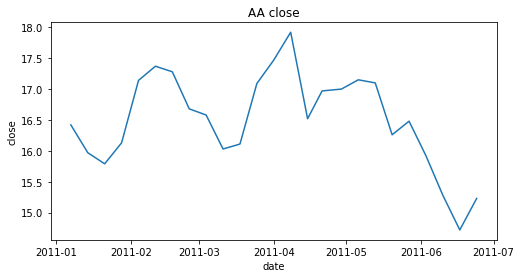

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))

# YOUR CODE HERE
fig = sns.lineplot(x=aa_df.index, y=aa_df.close)
plt.title("AA close")
plt.show()

In [17]:
assert_equal(aa_df.shape[0], 25, msg='aa_df is not correct.')
assert_equal(ax.get_title(), 'AA close', msg='Plot title is not AA close')
assert_equal(ax.get_xlabel(), 'date', msg='Plot xlabel is not date')
assert_equal(ax.get_ylabel(), 'close', msg='Plot ylabel is not close')